John Park (UBID: 50285417)

MTH 448

March 12, 2023

# Analyze the United States Census Bureau and Study the Economic Status

## Introduction

The United States Census Bureau conducts comprehensive surveys to collect valuable data on various aspects of the nation's socio-economic conditions. Among these surveys, the Economic Census stands out as the primary source of information about the country's businesses, industries, and economic landscape. Conducted every five years, the Economic Census provides a detailed snapshot of the American business sector, including insights on economic activity at national, state, and local levels. This invaluable dataset allows different studies to delve into the intricate workings of the U.S. economy, identify trends and patterns, and uncover essentials that influence policy decisions, research studies, and business strategies.

This project will analyze the Economic Census data to gain a better understanding of the American business environment, exploring various dimensions such as industry composition, poverty status, difference in revenues, and regional disparities. By examining correlations between variables, creating high-quality visualizations, and identifying outliers, this project aims to unveil unexpected findings and counterintuitive insights. The investigation will shed light on the dynamics of the U.S. economy and offer valuable perspectives on its growth, challenges, and opportunities, and the expedition through the Economic Census data will uncover the complex relationships that drive the American business landscape, providing a rich and nuanced picture of the nation's economic fabric.

In advance of the whole project, the first step is installing censusdata and plotly.

In [8]:
#import sys
#!{sys.executable} -m pip install censusdata
#!{sys.executable} -m pip install plotly

The next step is displaying of plots within the Jupyter Notebook and importing pandas for data manipulation and analysis, census data for search for and download data from the U.S. Census Bureau, and plotly.express for visualization

In [302]:
%pylab inline
import pandas as pd
import censusdata
import plotly.express as px

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Part 1. Analyzing the Data of Median Earnings by Sex

In today's increasingly diverse workforce, understanding the dynamics of median earnings by sex is essential for evaluating economic opportunities and addressing potential disparities. In this analysis, the median earnings data by sex will be explored to identify trends and patterns.

The analysis starts with searching for information using the censusdata library.

In [131]:
#searches for tables in the 2017 ACS 5-year estimates dataset
earning_data = censusdata.search('acs5', 2017,'concept', 'SEX BY INDUSTRY AND MEDIAN EARNINGS IN THE PAST 12 MONTHS')
earning_data

[('B24032_001E',
  'SEX BY INDUSTRY AND MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Male'),
 ('B24032_002E',
  'SEX BY INDUSTRY AND MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Male!!Agriculture, forestry, fishing and hunting, and mining'),
 ('B24032_003E',
  'SEX BY INDUSTRY AND MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Male!!Agriculture, forestry, fishing and hunting, and mining!!Agriculture, forestry, fishing and hunting'),
 ('B24032_004E',
  'SEX BY INDUSTRY AND MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Male!!Agriculture, forestry, fishing and hunting, and mining!!Mining, quarrying,

In [224]:
#from the dataset above, prints the information about the table with the ID 'B24032' and 'B24042'
censusdata.printtable(censusdata.censustable('acs5', 2017, 'B24032'))
censusdata.printtable(censusdata.censustable('acs5', 2017, 'B24042'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B24032_001E  | SEX BY INDUSTRY AND MEDIAN EAR | !! Estimate Male                                         | int  
B24032_002E  | SEX BY INDUSTRY AND MEDIAN EAR | !! !! Estimate Male Agriculture, forestry, fishing and h | int  
B24032_003E  | SEX BY INDUSTRY AND MEDIAN EAR | !! !! !! Estimate Male Agriculture, forestry, fishing an | int  
B24032_004E  | SEX BY INDUSTRY AND MEDIAN EAR | !! !! !! Estimate Male Agriculture, forestry, fishing an | int  
B24032_005E  | SEX BY INDUSTRY AND MEDIAN EAR | !! !! Estimate Male Construction                         | int  
B24032_006E  | SEX BY INDUSTRY AND MEDIAN EAR | !! !! Estimate Male Manufacturing                        | int  
B24032_007E  | SEX BY INDUSTRY AND MEDIAN EAR | !! !! Estimate Male Wholesale trade          

In [248]:
# download data from the ACS 5-year estimates dataset for 2017
#'acs5': indicates the dataset is the ACS 5-year estimates
#'2017': specifies the year for which the data is being downloaded
#'censusdata.censusgeo([('state', '*')])': specifies the geographical scope of the data
#[]:list of variable codes to be downloaded
earning = censusdata.download('acs5', 2017, censusdata.censusgeo([('state', '*')]),
                                 ['B24032_001E','B24032_028E','B24042_001E','B24042_028E'])
earning

,B24032_001E,B24032_028E,B24042_001E,B24042_028E
"Mississippi: Summary level: 040, state:28",35986,25530,41932,32172
"Missouri: Summary level: 040, state:29",39331,27987,47023,36701
"Montana: Summary level: 040, state:30",37095,25449,46231,34655
"Nebraska: Summary level: 040, state:31",40855,27999,47702,36859
"Nevada: Summary level: 040, state:32",37249,30331,45537,37223
"New Hampshire: Summary level: 040, state:33",48308,32572,57451,44652
"New Jersey: Summary level: 040, state:34",52185,36389,63628,51151
"New Mexico: Summary level: 040, state:35",35304,25608,43821,35674
"Alabama: Summary level: 040, state:01",38754,26181,46743,35114
"Alaska: Summary level: 040, state:02",50592,35700,61320,47466


In [377]:
#rename the name of variable code to the followings
rename_earning = {'B24032_001E': 'Median Earnings of Average Male Over 16 in The Past 12 Months',
            'B24032_028E': 'Median Earnings of Average Female Over 16 in The Past 12 Months',
            'B24042_001E': 'Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months',
            'B24042_028E': 'Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months'}

In [250]:
#processes the DataFrame by extracting state names from the index, 
#renaming specified columns, and returning the modified DataFrame
#df: dataframe
#rename_dict: a dictionary of column names
def extract_state_rename_columns(df,rename_dict):
    state_names = []
    for index in df.index.tolist():
            state_names.append(index.name.split(',')[0])
    df.index = state_names
    for col_name in rename_dict:
        df = df.rename(columns={col_name: rename_dict[col_name]})
    df = df.reset_index(level=0)
    df = df.rename({'index':'States'},axis=1)
    return df

In [251]:
#rebuild the data using extract_state_rename_columns method
earning = extract_state_rename_columns(earning, rename_earning)
earning.set_index('States')

,Median Earnings of Average Male Over 16 in The Past 12 Months,Median Earnings of Average Female Over 16 in The Past 12 Months,"Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months","Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months"
States,,,,
Mississippi,35986,25530,41932,32172
Missouri,39331,27987,47023,36701
Montana,37095,25449,46231,34655
Nebraska,40855,27999,47702,36859
Nevada,37249,30331,45537,37223
New Hampshire,48308,32572,57451,44652
New Jersey,52185,36389,63628,51151
New Mexico,35304,25608,43821,35674
Alabama,38754,26181,46743,35114


The table above gives four different categories: every male over 16, every female over 16, full-time male over 16, and full-time female over 16. Following codes display the top 5 states of each category through sliced tables and bar graphs.

#### Top 5 States with Median Earnings of Average Male Over 16 in The Past 12 Months

In [352]:
#sorts a earning based on the values in the column 'Median Earnings of Average Male Over 16 in The Past 12 Months'
#selects that column and states column, and takes the top 5 rows of the sorted DataFrame
earningMale = earning.sort_values(by='Median Earnings of Average Male Over 16 in The Past 12 Months', 
                                  ascending=False)[['States',
                                    'Median Earnings of Average Male Over 16 in The Past 12 Months']].head(5)
earningMale

,States,Median Earnings of Average Male Over 16 in The Past 12 Months
34,District of Columbia,62516
6,New Jersey,52185
35,Connecticut,52105
48,Massachusetts,51901
47,Maryland,51447


Below is the bar graph of the table.

<AxesSubplot:xlabel='States'>

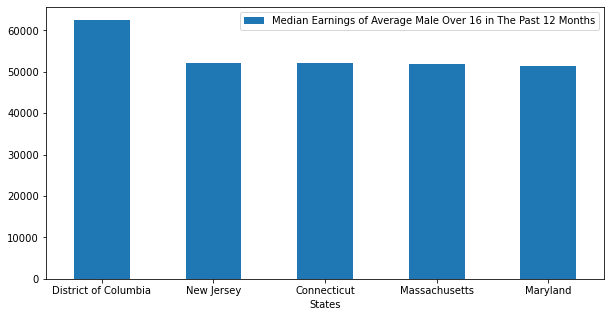

In [384]:
#set the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))
#creates a bar plot of the earningMale using the 'States' column for the x-axis 
#and the 'Median Earnings of Average Male Over 16 in The Past 12 Months' column for the y-axis
earningMale.plot.bar(x='States', y='Median Earnings of Average Male Over 16 in The Past 12 Months', rot=0, ax = ax)

#### Top 5 States with Median Earnings of Average Female Over 16 in The Past 12 Months

In [344]:
#sorts a earning based on the values in the column 'Median Earnings of Average Female Over 16 in The Past 12 Months'
#selects that column and states column, and takes the top 5 rows of the sorted DataFrame
earningFemale = earning.sort_values(by='Median Earnings of Average Female Over 16 in The Past 12 Months',
                                    ascending=False)[['States',
                                'Median Earnings of Average Female Over 16 in The Past 12 Months']].head(5)
earningFemale


,States,Median Earnings of Average Female Over 16 in The Past 12 Months
34,District of Columbia,51695
47,Maryland,40246
48,Massachusetts,36871
35,Connecticut,36400
6,New Jersey,36389


Below is the bar graph of the table.

<AxesSubplot:xlabel='States'>

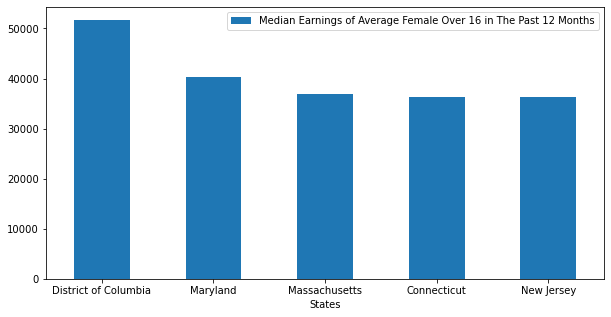

In [385]:
#set the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))
#creates a bar plot of the earningFemale using the 'States' column for the x-axis 
#and the 'Median Earnings of Average Female Over 16 in The Past 12 Months' column for the y-axis
earningFemale.plot.bar(x='States', y='Median Earnings of Average Female Over 16 in The Past 12 Months', rot=0, ax=ax)

#### Top 5 States with Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months

In [378]:
#sorts a earning based on the values in the column 
#'Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months'
#selects that column and states column, and takes the top 5 rows of the sorted DataFrame
earningFullMale = earning.sort_values(by=
                            'Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months', 
                        ascending=False)[['States',
                    'Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months']].head(5)
earningFullMale

,States,"Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months"
34,District of Columbia,74867
35,Connecticut,64361
48,Massachusetts,64261
6,New Jersey,63628
47,Maryland,61780


Below is the bar graph of the table.

<AxesSubplot:xlabel='States'>

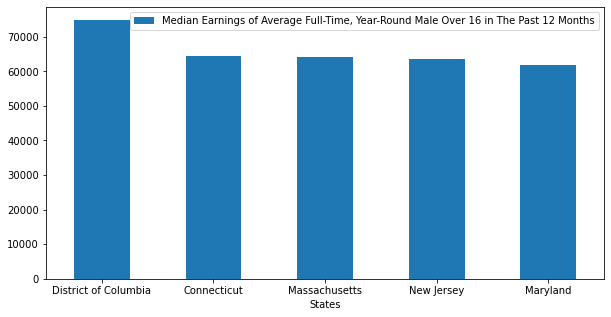

In [386]:
#set the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))
#creates a bar plot of the earningFullMale using the 'States' column for the x-axis 
#and the 'Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months' column for the y-axis
earningFullMale.plot.bar(x='States', 
                     y='Median Earnings of Average Full-Time, Year-Round Male Over 16 in The Past 12 Months', rot=0,
                        ax = ax)

#### Top 5 States with Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months

In [346]:
#sorts a earning based on the values in the column 
#'Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months'
#selects that column and states column, and takes the top 5 rows of the sorted DataFrame
earningFullFemale = earning.sort_values(by=
                'Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months', 
                ascending=False)[['States',
                'Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months']].head(5)
earningFullFemale

,States,"Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months"
34,District of Columbia,65526
48,Massachusetts,52382
47,Maryland,52145
35,Connecticut,51609
6,New Jersey,51151


Below is the bar graph of the table.

<AxesSubplot:xlabel='States'>

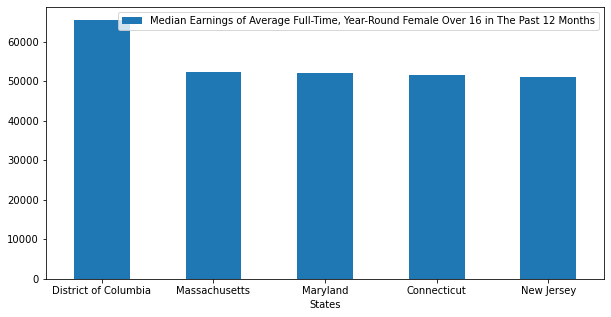

In [387]:
#set the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))
#creates a bar plot of the earningFullFemale using the 'States' column for the x-axis 
#and the 'Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months' column for the y-axis
earningFullFemale.plot.bar(x='States', 
                y='Median Earnings of Average Full-Time, Year-Round Female Over 16 in The Past 12 Months', rot=0,
                          ax = ax)

From the tables and bar graphs of 4 different categories, it is noticed that top 5 states are consistent as District of Columbia, Massachusetts, Maryland, Connecticut, and New Jersey. Moreover, among those 5 states, District of Columbia dominantly possesss the highest median earnings. The reason of this situation would be the high presences of high ranked officials of the US government.

In addition to the information about the states, even though it is commonly understandable, full-time civilans have higher median earnings, and no matter the domain of investigation includes the part-time civilians, male civilians have higher median earnings than female civilians. It indicates that normally, there are more male civilians who are working in the whole industries.

## Part 2. Analyzing the Data of Poverty Status

Analyzing poverty status data is crucial for understanding the economic well-being of different populations and regions. By examining various factors that contribute to poverty, such as income, education, employment, and social services, we can gain a comprehensive view of the challenges faced by individuals and communities living in poverty.

In this analysis, the data on poverty status across different regions will be explored. Statistical methods and high-quality visualizations will be used to identify trends, patterns, and disparities in poverty levels. This investigation will help to uncover the underlying factors that contribute to the persistence of poverty and offer insights into potential solutions for reducing poverty and improving economic opportunities for all to combat poverty and create a more equitable society.

In [374]:
#searches for tables in the 2017 ACS 5-year estimates dataset
poverty_data = censusdata.search('acs5', 2017,'concept',
                        'POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVIDUALS BY SEX BY EMPLOYMENT STATUS')
poverty_data

[('B17005_001E',
  'POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVIDUALS BY SEX BY EMPLOYMENT STATUS',
  'Estimate!!Total'),
 ('B17005_002E',
  'POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVIDUALS BY SEX BY EMPLOYMENT STATUS',
  'Estimate!!Total!!Income in the past 12 months below poverty level'),
 ('B17005_003E',
  'POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVIDUALS BY SEX BY EMPLOYMENT STATUS',
  'Estimate!!Total!!Income in the past 12 months below poverty level!!Male'),
 ('B17005_004E',
  'POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVIDUALS BY SEX BY EMPLOYMENT STATUS',
  'Estimate!!Total!!Income in the past 12 months below poverty level!!Male!!In labor force'),
 ('B17005_005E',
  'POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVIDUALS BY SEX BY EMPLOYMENT STATUS',
  'Estimate!!Total!!Income in the past 12 months below poverty level!!Male!!In labor force!!Employed'),
 ('B17005_006E',
  'POVERTY STATUS IN THE PAST 12 MONTHS OF INDIVIDUALS BY SEX BY EMPLOYMENT STATUS',
  'Estimate!!Total

In [211]:
#from the dataset above, prints the information about the table with the ID 'B17005'
censusdata.printtable(censusdata.censustable('acs5', 2017, 'B17005'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B17005_001E  | POVERTY STATUS IN THE PAST 12  | !! Estimate Total                                        | int  
B17005_002E  | POVERTY STATUS IN THE PAST 12  | !! !! Estimate Total Income in the past 12 months below  | int  
B17005_003E  | POVERTY STATUS IN THE PAST 12  | !! !! !! Estimate Total Income in the past 12 months bel | int  
B17005_004E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17005_005E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! !! Estimate Total Income in the past 12 mont | int  
B17005_006E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! !! Estimate Total Income in the past 12 mont | int  
B17005_007E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past

In [306]:
# download data from the ACS 5-year estimates dataset for 2017
#'acs5': indicates the dataset is the ACS 5-year estimates
#'2017': specifies the year for which the data is being downloaded
#'censusdata.censusgeo([('state', '*')])': specifies the geographical scope of the data
#[]:list of variable codes to be downloaded
poverty = censusdata.download('acs5', 2017, censusdata.censusgeo([('state', '*')]), 
                              ['B17005_001E','B17005_002E','B17005_003E','B17005_008E'])
poverty

,B17005_001E,B17005_002E,B17005_003E,B17005_008E
"Mississippi: Summary level: 040, state:28",2248943,425166,168426,256740
"Missouri: Summary level: 040, state:29",4680557,614076,257999,356077
"Montana: Summary level: 040, state:30",805103,108599,49356,59243
"Nebraska: Summary level: 040, state:31",1423266,154849,63947,90902
"Nevada: Summary level: 040, state:32",2254452,284194,126540,157654
"New Hampshire: Summary level: 040, state:33",1062520,81655,34491,47164
"New Jersey: Summary level: 040, state:34",7035985,667086,275122,391964
"New Mexico: Summary level: 040, state:35",1601090,290526,127153,163373
"Alabama: Summary level: 040, state:01",3757610,593871,238330,355541
"Alaska: Summary level: 040, state:02",545306,49606,23377,26229


In [307]:
#rename the name of variable code to the followings
rename_poverty = {'B17005_001E':'Population in the past 12 months',
                 'B17005_002E':'Population with Income below Poverty Level',
                 'B17005_003E':'Population of Male with Income below Poverty Level',
                 'B17005_008E':'Population of Female with Income below Poverty Level'}
#rebuild the data using extract_state_rename_columns method
poverty = extract_state_rename_columns(poverty, rename_poverty)
poverty

,States,Population in the past 12 months,Population with Income below Poverty Level,Population of Male with Income below Poverty Level,Population of Female with Income below Poverty Level
0,Mississippi,2248943,425166,168426,256740
1,Missouri,4680557,614076,257999,356077
2,Montana,805103,108599,49356,59243
3,Nebraska,1423266,154849,63947,90902
4,Nevada,2254452,284194,126540,157654
5,New Hampshire,1062520,81655,34491,47164
6,New Jersey,7035985,667086,275122,391964
7,New Mexico,1601090,290526,127153,163373
8,Alabama,3757610,593871,238330,355541
9,Alaska,545306,49606,23377,26229


For the poverty status, the U.S. map easily displays the poverty percentage of each state. In order to use the U.S. map, the code for each state is essential information. Thus, the code for each state will be inserted into the poverty dataframe.

In [332]:
#this is the dictionary of Full States Name and matching code of states
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [382]:
#calculates the poverty percentage of each state
poverty['Poverty Percentage'] = poverty[
    'Population in the past 12 months']/poverty['Population with Income below Poverty Level']
#adds a new column called 'State Code'
#map the state names in the 'States' column to their respective state codes using the code dictionary.
poverty['State Code'] = poverty['States'].map(code)
poverty

,States,Population in the past 12 months,Population with Income below Poverty Level,Population of Male with Income below Poverty Level,Population of Female with Income below Poverty Level,Poverty Percentage,Code,State Code
0,Mississippi,2248943,425166,168426,256740,5.289565,MS,MS
1,Missouri,4680557,614076,257999,356077,7.622114,MO,MO
2,Montana,805103,108599,49356,59243,7.413540,MT,MT
3,Nebraska,1423266,154849,63947,90902,9.191315,NE,NE
4,Nevada,2254452,284194,126540,157654,7.932792,NV,NV
5,New Hampshire,1062520,81655,34491,47164,13.012308,NH,NH
6,New Jersey,7035985,667086,275122,391964,10.547343,NJ,NJ
7,New Mexico,1601090,290526,127153,163373,5.511004,NM,NM
8,Alabama,3757610,593871,238330,355541,6.327317,AL,AL
9,Alaska,545306,49606,23377,26229,10.992743,AK,AK


In [383]:
#creates a choropleth map of the United States using the poverty DataFrame and the Plotly Express library (px)
#map visualizes the poverty percentage for each state using color
#create a choropleth map using the poverty DataFrame
#locations: determine the geographical locations for the plot
#locaitonmode: the map should be of the United States, using state-level boundaries
#color: determine the color scale for the map
#scope:  the map only displays the USA and its states.
fig = px.choropleth(poverty, 
                    locations='State Code',     
                    locationmode='USA-states', 
                    color='Poverty Percentage', 
                    scope='usa'                 
)
fig.show()

The U.S. map displays that the darker colored states have lower poverty percentage.

Then, the table below presents top 5 states with the highest poverty percentage.

In [309]:
poverty.sort_values(by='Poverty Percentage', ascending=False).head(5)

,States,Population in the past 12 months,Population with Income below Poverty Level,Population of Male with Income below Poverty Level,Population of Female with Income below Poverty Level,Poverty Percentage
5,New Hampshire,1062520,81655,34491,47164,13.012308
47,Maryland,4657169,412640,167714,244926,11.286276
9,Alaska,545306,49606,23377,26229,10.992743
35,Connecticut,2823745,259877,108234,151643,10.865698
6,New Jersey,7035985,667086,275122,391964,10.547343


From the chart above, New Hampshire, Maryland, Alaska, Connecticut, and New Jersey have the highest poverty percentage, and among then, New Hampshire have excessively high poverty percentage. The goverment of these five states need to make a move of brining the balance among raising the minimum wage, creating more good-paying jobs, and preventing inflation and deflation from excessive change in poverty percentage.

## Part 3. Analyzing the Median Earnings by Occupation

Examining median earnings by occupation is essential for understanding the distribution of income and economic opportunities across different professions. The analysis about this will provide insights into the financial rewards associated with various occupations, revealing potential disparities and trends within the labor market.

In this study, data on median earnings across a diverse range of occupations will be explored. By employing statistical methods and creating high-quality visualizations, patterns and trends in earnings and any potential wage gaps within the workforce will be identified. Examining median earnings by occupation will help to understand the labor market and promote fair and equitable compensation for all workers.

In [366]:
#searches for tables in the 2017 ACS 5-year estimates dataset
occupation_earning_data = censusdata.search('acs5', 2017,'concept', 
                                            'OCCUPATION BY MEDIAN EARNINGS IN THE PAST 12 MONTHS')
occupation_earning_data

[('B24011_001E',
  'OCCUPATION BY MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Total'),
 ('B24011_002E',
  'OCCUPATION BY MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Total!!Management, business, science, and arts occupations'),
 ('B24011_003E',
  'OCCUPATION BY MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Total!!Management, business, science, and arts occupations!!Management, business, and financial occupations'),
 ('B24011_004E',
  'OCCUPATION BY MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
  'Estimate!!Total!!Management, business, science, and arts occupations!!Management, business, and financial occupa

In [367]:
# download data from the ACS 5-year estimates dataset for 2017
#'acs5': indicates the dataset is the ACS 5-year estimates
#'2017': specifies the year for which the data is being downloaded
#'censusdata.censusgeo([('state', '*')])': specifies the geographical scope of the data
#[]:list of variable codes to be downloaded
full_time_occupation_earning = censusdata.download('acs5', 2017, censusdata.censusgeo([('state', '*')]),
                    ['B24021_001E','B24021_002E','B24021_018E','B24021_026E','B24021_029E','B24021_033E'])
full_time_occupation_earning

,B24021_001E,B24021_002E,B24021_018E,B24021_026E,B24021_029E,B24021_033E
"Mississippi: Summary level: 040, state:28",37001,50014,23605,31833,40151,33293
"Missouri: Summary level: 040, state:29",41675,55372,25962,36032,42316,36804
"Montana: Summary level: 040, state:30",40674,51199,25986,33571,42181,39071
"Nebraska: Summary level: 040, state:31",42353,55348,27002,36752,41074,37190
"Nevada: Summary level: 040, state:32",41403,61533,32059,36301,45905,35182
"New Hampshire: Summary level: 040, state:33",51519,69173,32683,43343,48126,41408
"New Jersey: Summary level: 040, state:34",57422,82529,31647,47450,51661,37038
"New Mexico: Summary level: 040, state:35",40405,55827,24511,32196,38008,35927
"Alabama: Summary level: 040, state:01",40897,55560,24677,33470,39486,35421
"Alaska: Summary level: 040, state:02",53863,70221,34471,42799,63333,48469


In [368]:
#rename the name of variable code to the followings
rename_full_occu = {'B24021_001E':
            'Median Earnings of Total Occupation of Average Full-Time, Year-Round Over 16 in The Past 12 Months',
                    'B24021_002E':'Management, Business, Science, and Arts Occupations',
                    'B24021_018E':'Service Occupations',
                    'B24021_026E':'Sales and Office Occupations',
                    'B24021_029E':'Natural Resoures, Constructions, and Maintenance Occupations',
                    'B24021_033E':'Production, Transportation, and Material Moving Occupations'}
#rebuild the data using extract_state_rename_columns method
full_time_occupation_earning = extract_state_rename_columns(full_time_occupation_earning, rename_full_occu)
full_time_occupation_earning

,States,"Median Earnings of Total Occupation of Average Full-Time, Year-Round Over 16 in The Past 12 Months","Management, Business, Science, and Arts Occupations",Service Occupations,Sales and Office Occupations,"Natural Resoures, Constructions, and Maintenance Occupations","Production, Transportation, and Material Moving Occupations"
0,Mississippi,37001,50014,23605,31833,40151,33293
1,Missouri,41675,55372,25962,36032,42316,36804
2,Montana,40674,51199,25986,33571,42181,39071
3,Nebraska,42353,55348,27002,36752,41074,37190
4,Nevada,41403,61533,32059,36301,45905,35182
5,New Hampshire,51519,69173,32683,43343,48126,41408
6,New Jersey,57422,82529,31647,47450,51661,37038
7,New Mexico,40405,55827,24511,32196,38008,35927
8,Alabama,40897,55560,24677,33470,39486,35421
9,Alaska,53863,70221,34471,42799,63333,48469


In [286]:
#from the data above, the mean of each category is calculated
pie_data = full_time_occupation_earning[['Management, Business, Science, and Arts Occupations', 
                             'Service Occupations',
                             'Sales and Office Occupations',
                             'Natural Resoures, Constructions, and Maintenance Occupations',
                             'Production, Transportation, and Material Moving Occupations']].mean()

In [290]:
#using pie_data, the new dataframe is created
pie_dataframe = pie_data.to_frame().rename({0:'Mean Earnings Of Occupations'},axis=1)
pie_dataframe

,Mean Earnings Of Occupations
"Management, Business, Science, and Arts Occupations",61729.307692
Service Occupations,28167.423077
Sales and Office Occupations,38068.480769
"Natural Resoures, Constructions, and Maintenance Occupations",43357.403846
"Production, Transportation, and Material Moving Occupations",37944.269231


Then, the pie chart below gives easier understanding of the data.

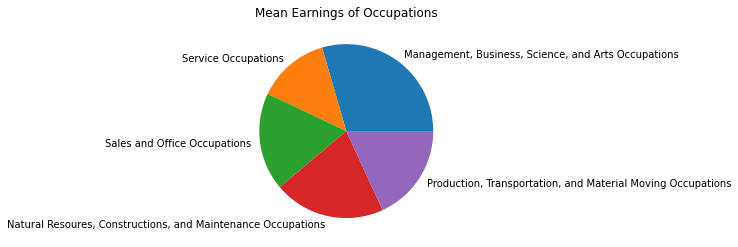

In [381]:
#pie chart of pie_dataframe
plt.pie(pie_dataframe['Mean Earnings Of Occupations'], labels = pie_dataframe.index)
#title of the pie chart
plt.title('Mean Earnings of Occupations')
plt.show()

From the table and pie chart above, the management, business, science, and arts occupations create overwhelmingly higher median earnings than the other occupations. It shows that the trends of occupations would be science, arts, and the management of them. It will increase the population to study on these areas, and more companies may focus more on these areas. The result of these circumstances may bring the enormous progress in sciences, which is happening currently.

Lastly, from the data above, top 5 states with the most and the least median earnings will be investigated in order to examine which states are highly developed and which are not.

In [369]:
#from full_time_occupation_earning data, top 5 states with the highest medain earnings have been discovered
full_time_occupation_earning.sort_values(by=
            'Median Earnings of Total Occupation of Average Full-Time, Year-Round Over 16 in The Past 12 Months', 
            ascending=False).head(5)

,States,"Median Earnings of Total Occupation of Average Full-Time, Year-Round Over 16 in The Past 12 Months","Management, Business, Science, and Arts Occupations",Service Occupations,Sales and Office Occupations,"Natural Resoures, Constructions, and Maintenance Occupations","Production, Transportation, and Material Moving Occupations"
34,District of Columbia,70057,86915,32102,50537,39962,36588
48,Massachusetts,59180,77689,35027,48799,52095,41665
35,Connecticut,58649,79575,35335,48912,51964,42452
6,New Jersey,57422,82529,31647,47450,51661,37038
47,Maryland,56878,79362,32835,44851,46246,41170


In [370]:
#from full_time_occupation_earning data, top 5 states with the least medain earnings have been discovered
full_time_occupation_earning.sort_values(by=
            'Median Earnings of Total Occupation of Average Full-Time, Year-Round Over 16 in The Past 12 Months', 
            ascending=False).tail(5)

,States,"Median Earnings of Total Occupation of Average Full-Time, Year-Round Over 16 in The Past 12 Months","Management, Business, Science, and Arts Occupations",Service Occupations,Sales and Office Occupations,"Natural Resoures, Constructions, and Maintenance Occupations","Production, Transportation, and Material Moving Occupations"
17,Oklahoma,40081,51821,24828,33805,41110,37628
36,Florida,39939,55970,26034,35121,34323,31976
11,Arkansas,37301,51442,23798,32378,36357,33122
0,Mississippi,37001,50014,23605,31833,40151,33293
32,Puerto Rico,23538,32390,17465,21424,19255,18754


Two charts above display the excessively distinct disparity between states with the highest and the lowest median earnings. The median earning of District of Columbia is three times higher than that of Puerto Rico. Bottom five states may need more growth in management, business, sicence, and arts occupations, which would strongly support the development.

## Concluding this Project

From the three parts of this project, it is discovered that there are quite enormous gaps between states in terms of median earnings and poverty ratios. Moreover, the monetary flow of the U.S. is excessively leaned toward the science, arts, and management of them.

Then, from the Part1, Maryland, New Jersey, and Connecticut are three of the five states with the highest median earnings; however, from part 2, they are also three of the five states with the highest poverty percentage. This investigation refers to that a few super-wealthy people and coroporations dominate the large proportions of earnings, which can result in excessive disparity between rich and poor and may increase it more.

With these valuable informations, policy makers, researcher, and employers need to foster a more equitable society and inclusive workforce.

## References

U.S. Bureau of Labor Statistics. (2005, September 27). Appendix D - USPS state abbreviations and FIPS codes. U.S. Bureau of Labor Statistics. Retrieved March 19, 2023, from https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm 